# Project Questions and Answers

### Project Question:
Does the adoption of renewable energy contribute to economic growth in Latin American countries?

### Answer Summary:
1. **Correlation Analysis:**
   - The correlation between GDP growth and renewable energy share is weak (0.075), suggesting limited direct impact of renewable energy adoption on GDP growth.

2. **Top Countries by Renewable Energy Share:**
   - Countries like Paraguay (100%), Costa Rica (99.37%), and Uruguay (92.43%) lead in renewable energy adoption.

3. **Impact of Economic Downturns:**
   - Significant GDP declines often coincide with external crises, showing less linkage to renewable energy trends.

4. **Regional Trends:**
   - Renewable energy adoption shows a steady increase, while GDP growth remains volatile, suggesting independent growth patterns.

### Conclusion:
While renewable energy adoption is progressing steadily in Latin America, its direct influence on economic growth is minimal and overshadowed by external economic factors. Policymakers should focus on integrating renewable energy with broader economic strategies to maximize its potential impact.

# Renewable Energy Adoption and Economic Growth in Latin America
This notebook analyzes the relationship between the adoption of renewable energy and economic growth in Latin American countries. The analysis focuses on data related to GDP growth and renewable energy share in electricity generation.

In [25]:
# Import necessary libraries
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.colors



In [2]:

# Load the GDP and Renewable Energy datasets
gdp_data_path = 'gdp_data_cleaned.csv'
re_data_path = 're_data_cleaned.csv'

# Read the datasets
gdp_data = pd.read_csv(gdp_data_path)
re_data = pd.read_csv(re_data_path)

# Display the GDP data
display(gdp_data.head())

# Display the Renewable Energy data
display(re_data.head())

# Merge datasets on Country/Region and Year for analysis
merged_data = pd.merge(
    gdp_data,
    re_data,
    left_on=['Country Name', 'Year'],
    right_on=['Region/country/area', 'Year'],
    how='inner'
)
# Drop unwanted columns
merged_data = merged_data.drop(columns=['Indicator Name', 'Indicator Code','Region/country/area'])

# Display the first few rows of the merged dataset
display(merged_data.head())

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP Growth (%)
0,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2018,-2.617396
1,Bolivia,BOL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2018,4.223624
2,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2018,1.783667
3,Chile,CHL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2018,3.990029
4,Colombia,COL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2018,2.564324


,Region/country/area,Year,RE share of electricity generation (%),RE share of electricity capacity (%)
0,Argentina,2018,24.12,29.32
1,Argentina,2019,25.25,31.21
2,Argentina,2020,25.79,32.94
3,Argentina,2021,24.44,34.46
4,Argentina,2022,29.18,34.66


,Country Name,Country Code,Year,GDP Growth (%),RE share of electricity generation (%),RE share of electricity capacity (%)
0,Argentina,ARG,2018,-2.617396,24.12,29.32
1,Brazil,BRA,2018,1.783667,81.57,83.17
2,Chile,CHL,2018,3.990029,46.30,47.07
3,Colombia,COL,2018,2.564324,76.71,68.72
4,Costa Rica,CRI,2018,2.615904,98.61,84.35


In [3]:
# Correlation between GDP Growth and Renewable Energy Share
correlation = merged_data[['GDP Growth (%)', 'RE share of electricity generation (%)']].corr()
print('Correlation between GDP Growth and Renewable Energy Share:')
print(correlation)


Correlation between GDP Growth and Renewable Energy Share:
                                        GDP Growth (%)  \
GDP Growth (%)                                1.000000   
RE share of electricity generation (%)        0.074746   

                                        RE share of electricity generation (%)  
GDP Growth (%)                                                        0.074746  
RE share of electricity generation (%)                                1.000000  


In [4]:
# Top 5 countries with the highest average renewable energy generation
top_countries_re = merged_data.groupby('Country Name')['RE share of electricity generation (%)'].mean().sort_values(ascending=False).head(5)
print('\nTop 5 Countries by Average Renewable Energy Share:')
print(top_countries_re)




Top 5 Countries by Average Renewable Energy Share:
Country Name
Paraguay       100.000
Costa Rica      99.366
Uruguay         92.426
Brazil          82.248
El Salvador     79.712
Name: RE share of electricity generation (%), dtype: float64


In [5]:
# Regional trend of Renewable Energy Share and GDP Growth for Latin America
latin_america_trend = merged_data.groupby('Year').agg({
    'GDP Growth (%)': 'mean',
    'RE share of electricity generation (%)': 'mean'
}).reset_index()
print('\nRegional trend of Renewable Energy Share and GDP Growth:')
print(latin_america_trend)



Regional trend of Renewable Energy Share and GDP Growth:
   Year  GDP Growth (%)  RE share of electricity generation (%)
0  2018        2.229855                               60.817647
1  2019        1.319384                               58.430000
2  2020       -7.266230                               62.532941
3  2021        9.187786                               62.631176
4  2022        4.227768                               63.270000


In [6]:
# Years with significant GDP decline
gdp_decline_years = merged_data[merged_data['GDP Growth (%)'] < 0][['Country Name', 'Year', 'GDP Growth (%)', 'RE share of electricity generation (%)']]
print('\nYears with Significant GDP Decline:')
print(gdp_decline_years)

# Save the regional trend data to a CSV file for review
latin_america_trend_path = 'latin_america_renewable_energy_and_gdp_trend.csv'
latin_america_trend.to_csv(latin_america_trend_path, index=False)

# Print the first few rows of the dataframe for review
print('\nPreview of the Regional Trend Data:')
print(latin_america_trend.head())

# Provide the download link for the CSV file
print(f'Download the regional trend data CSV from this link: {latin_america_trend_path}')


Years with Significant GDP Decline:
          Country Name  Year  GDP Growth (%)  \
0            Argentina  2018       -2.617396   
11           Nicaragua  2018       -3.363706   
17           Argentina  2019       -2.000861   
22                Cuba  2019       -0.163087   
27              Mexico  2019       -0.251336   
28           Nicaragua  2019       -2.896488   
31            Paraguay  2019       -0.401855   
34           Argentina  2020       -9.900485   
35              Brazil  2020       -3.276759   
36               Chile  2020       -6.143475   
37            Colombia  2020       -7.185914   
38          Costa Rica  2020       -4.273354   
39                Cuba  2020      -10.949085   
40  Dominican Republic  2020       -6.720239   
41             Ecuador  2020       -9.245096   
42           Guatemala  2020       -1.791858   
43            Honduras  2020       -8.965082   
44              Mexico  2020       -8.624556   
45           Nicaragua  2020       -1.755380   
46 

###  Correlation Between GDP Growth and Renewable Energy Share

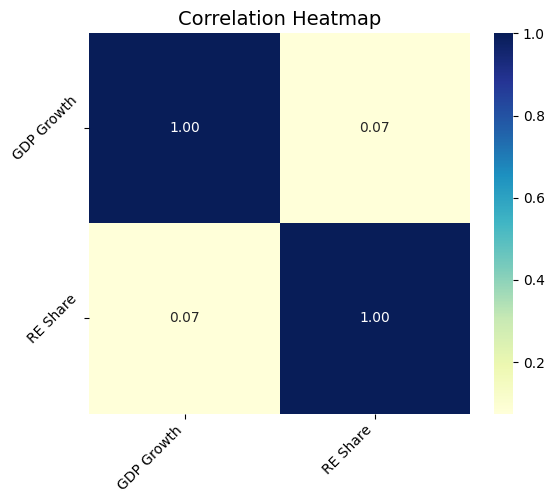

In [31]:

# Compute correlation matrix for selected variables
correlation_matrix = merged_data[[
    "GDP Growth (%)",
    "RE share of electricity generation (%)"
]].corr()

# Rename variables for shorter titles
correlation_matrix = correlation_matrix.rename(
    index={
        "GDP Growth (%)": "GDP Growth",
        "RE share of electricity generation (%)": "RE Share"
    },
    columns={
        "GDP Growth (%)": "GDP Growth",
        "RE share of electricity generation (%)": "RE Share"
    }
)

# Create the heatmap with the YlGnBu color palette
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",  # Updated color palette
    cbar=True,
    square=True
)

# Add title and adjust labels
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


###  Average GDP Growth by Country





<ipython-input-8-70e1769a976f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


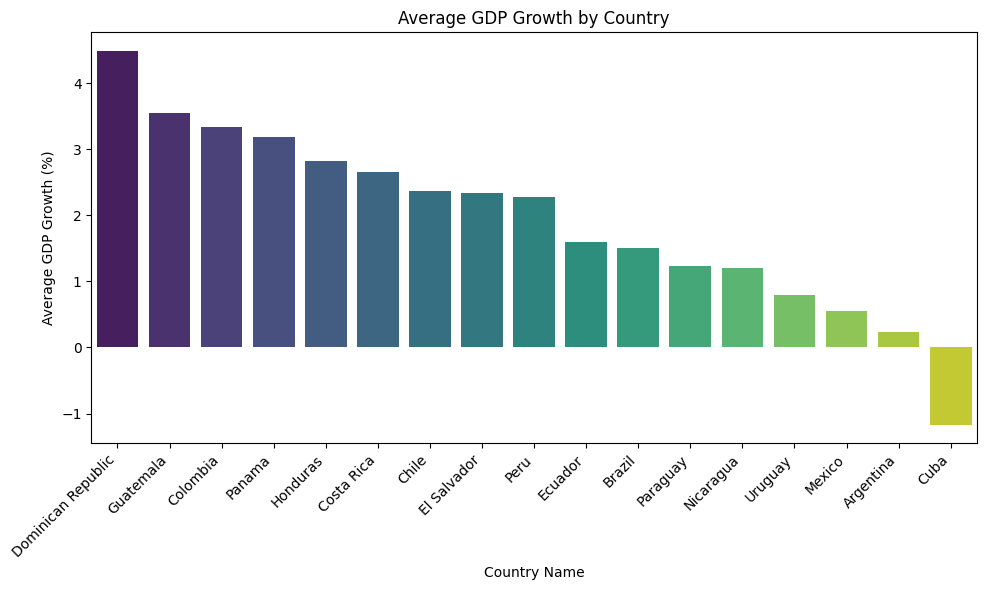

In [8]:

avg_data = merged_data.groupby('Country Name').agg({
    'GDP Growth (%)': 'mean',
    'RE share of electricity generation (%)': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_data.sort_values(by='GDP Growth (%)', ascending=False),
    x='Country Name',
    y='GDP Growth (%)',
    palette='viridis'
)
plt.title('Average GDP Growth by Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average GDP Growth (%)')
plt.xlabel('Country Name')
plt.tight_layout()
plt.show()

###  Average Renewable Energy Share by Country

<ipython-input-9-fa78d38bc71a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


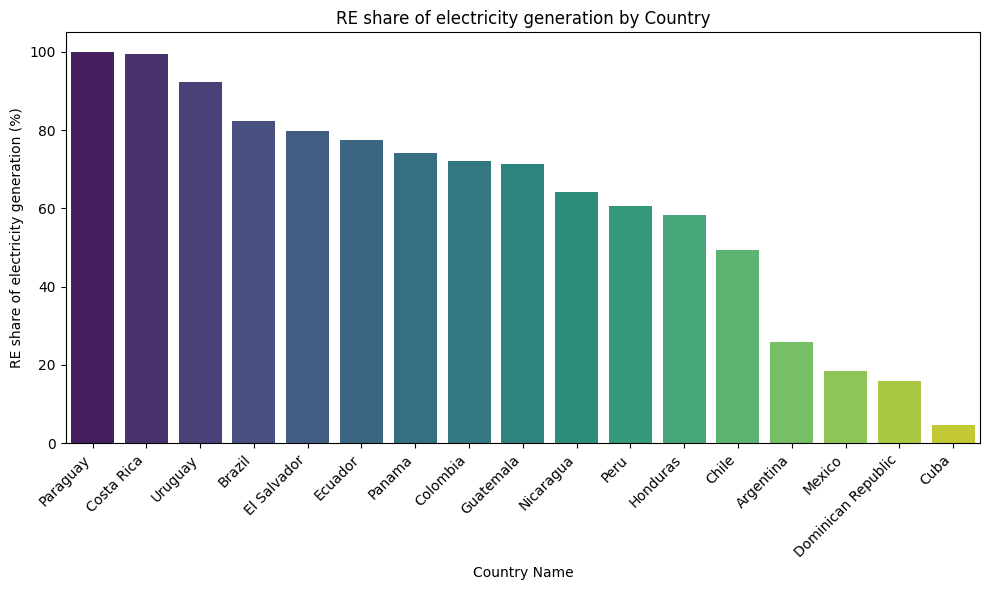

In [9]:
# 3. Average Renewable Energy Share vs. Average GDP Growth
avg_data = merged_data.groupby('Country Name').agg({
    'GDP Growth (%)': 'mean',
    'RE share of electricity generation (%)': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_data.sort_values(by='RE share of electricity generation (%)', ascending=False),
    x='Country Name',
    y='RE share of electricity generation (%)',
    palette='viridis'
)
plt.title('RE share of electricity generation by Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RE share of electricity generation (%)')
plt.xlabel('Country Name')
plt.tight_layout()
plt.show()

###  Country specific GDP Growth Over Time & Renewbal energy adoption over time

In [43]:
# Interactive Plot with Plotly for GDP Growth (Area Chart)
fig = px.area(
    merged_data,
    x="Year",
    y="GDP Growth (%)",
    color="Country Name",
    title="GDP Growth Over Time by Country",
    labels={"GDP Growth (%)": "GDP Growth (%)"}
)
fig.show()

# Interactive Plot with Plotly for Renewable Energy Share (Area Chart)
fig = px.area(
    merged_data,
    x="Year",
    y="RE share of electricity generation (%)",
    color="Country Name",
    title="Renewable Energy Share Over Time by Country",
    labels={"RE share of electricity generation (%)": "Renewable Energy Share (%)"}
)
fig.show()

###  Comparative Trend of Renewable Energy Share and GDP Growth

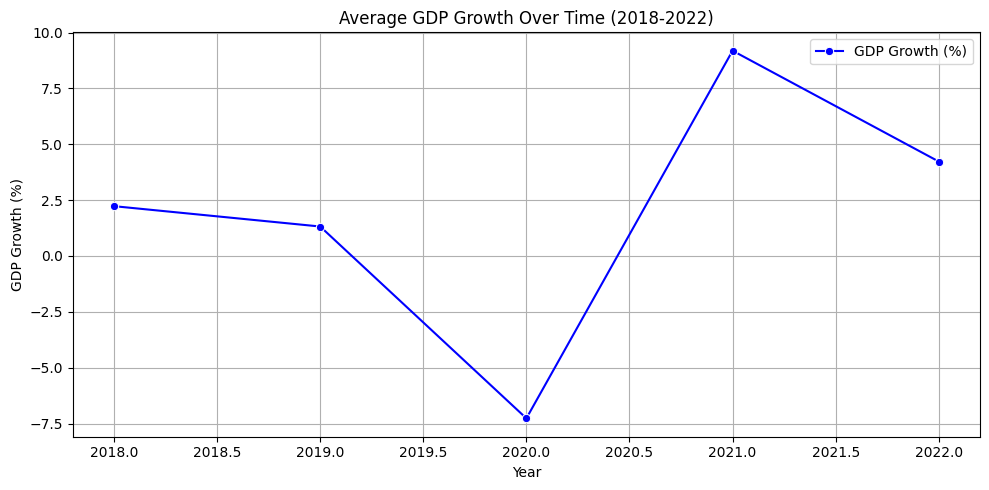

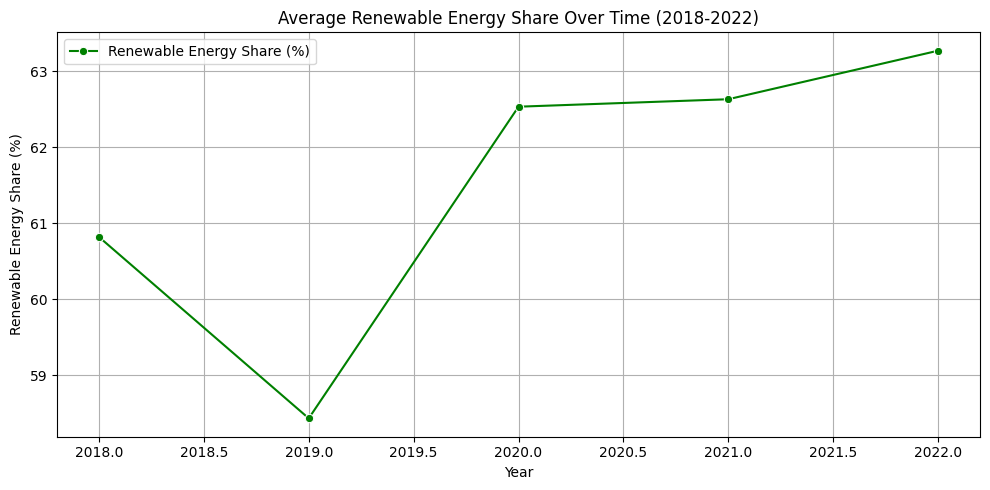

In [13]:
# Aggregate data for regional trends
regional_trend = merged_data.groupby('Year').agg({
    'GDP Growth (%)': 'mean',
    'RE share of electricity generation (%)': 'mean'
}).reset_index()

# Plot 1: GDP Growth Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=regional_trend, x='Year', y='GDP Growth (%)', marker='o', label='GDP Growth (%)', color='blue')
plt.title('Average GDP Growth Over Time (2018-2022)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Renewable Energy Share Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=regional_trend, x='Year', y='RE share of electricity generation (%)', marker='o', label='Renewable Energy Share (%)', color='green')
plt.title('Average Renewable Energy Share Over Time (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()